# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science



## Group #20: Final Project - World Cup Predictions 

**Harvard University**<br>
**Fall 2018**<br>
**Group Members:** <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

from sklearn.model_selection import train_test_split

## Goals:

Predict the winner of the 2018 Fifa  World Cup<br>
Predict outcomes of individual games/matches for the entire competition

In [2]:
results = pd.read_csv('worldcup2018/datasets/fifa/international_results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39638 entries, 0 to 39637
Data columns (total 11 columns):
date          39638 non-null datetime64[ns]
home_team     39638 non-null object
away_team     39638 non-null object
home_score    39638 non-null int64
away_score    39638 non-null int64
tournament    39638 non-null object
city          39638 non-null object
country       39638 non-null object
neutral       39638 non-null bool
year          39638 non-null int64
month         39638 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.1+ MB


In [5]:
results[(results['year'] == 2018) & (results['tournament'] == 'FIFA World Cup')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
39606,2018-06-14,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False,2018,6
39607,2018-06-15,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,2018,6
39608,2018-06-15,Morocco,Iran,0,1,FIFA World Cup,St. Petersburg,Russia,True,2018,6
39609,2018-06-15,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,2018,6
39610,2018-06-16,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,2018,6
39611,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6
39612,2018-06-16,Peru,Denmark,0,1,FIFA World Cup,Saransk,Russia,True,2018,6
39613,2018-06-16,Croatia,Nigeria,2,0,FIFA World Cup,Kaliningrad,Russia,True,2018,6
39614,2018-06-17,Costa Rica,Serbia,0,1,FIFA World Cup,Samara,Russia,True,2018,6
39615,2018-06-17,Germany,Mexico,0,1,FIFA World Cup,Moscow,Russia,True,2018,6


In [6]:
players = pd.read_csv('worldcup2018/datasets/sofifa/CompleteDataset.csv', index_col='Unnamed: 0')
players.head()

C:\Users\inani001\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
players = players.drop(['Photo', 'Flag', 'Club Logo'], axis=1)

In [8]:
players.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


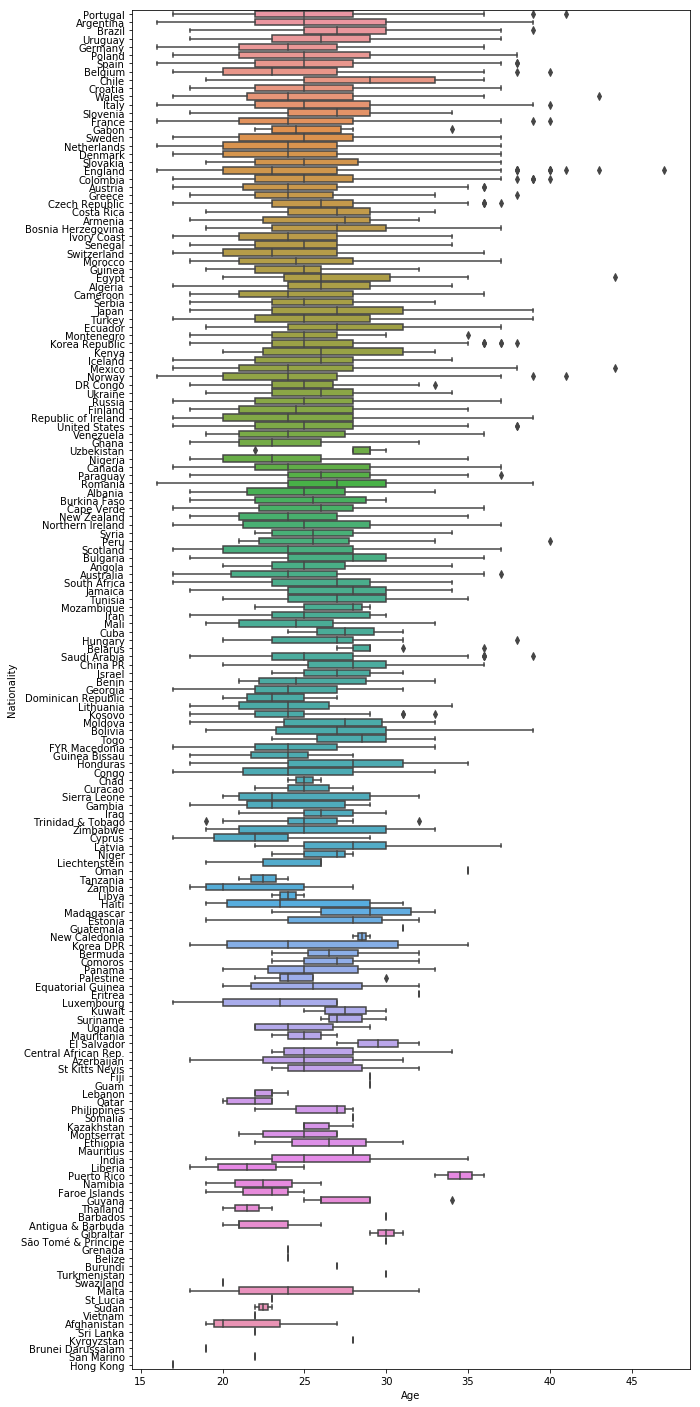

In [9]:
#country_list= ['Germany', 'France', 'England']
fig, ax =plt.subplots(1,1, figsize=(10,25))
ax=sns.boxplot(y='Nationality', x='Age', orient='h', data=players)

In [10]:
players['Wage'] = players['Wage'].apply(lambda x: x.split('€')[-1].split('K')[0])
players.Wage = players.Wage.astype('int32')

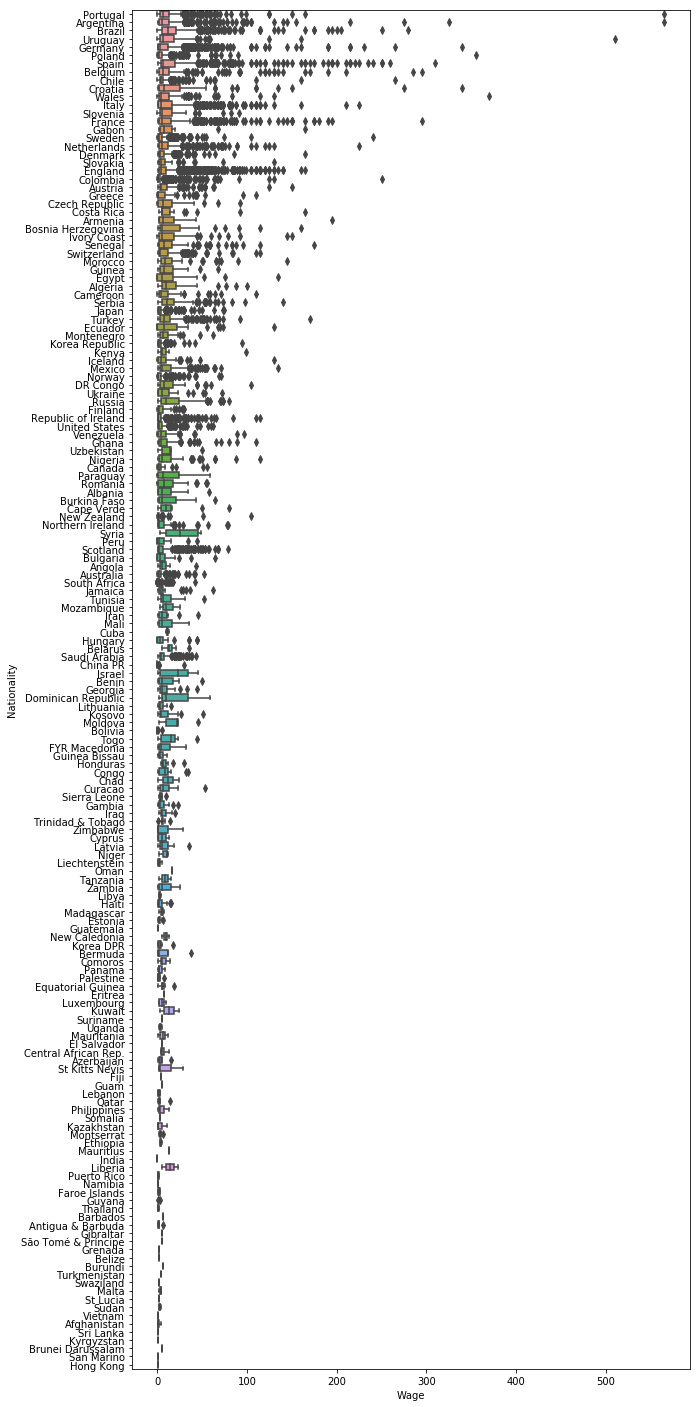

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,25))
ax=sns.boxplot(y='Nationality', x='Wage', orient='h', data=players)

In [12]:
countries = players.groupby(['Nationality']).agg({'Age': np.mean, 'Wage': np.mean})
countries.head()

,Age,Wage
Nationality,,
Afghanistan,22.000000,2.000000
Albania,24.685714,10.514286
Algeria,26.543860,17.982456
Angola,25.600000,9.000000
Antigua & Barbuda,22.400000,2.600000


In [13]:
len(players['Nationality'].unique())

165

In [135]:
# get fifa 18 national team stats
from bs4 import BeautifulSoup
import requests

my_page = requests.get('https://sofifa.com/teams/national?v=18&e=159096&set=true&showCol=sa')
fifa_soup = BeautifulSoup(my_page.text, 'html.parser')
fifa_soup.prettify()[0:500]

'<!DOCTYPE HTML>\n<html lang="en-US">\n <head>\n  <title>\n   Teams FIFA 18 May 17, 2018 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2018 SoFIFA.com" name="copyright"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link hr'

In [143]:
def parse_stats(soupname: BeautifulSoup):
    listofdicts=[]
    stats = soupname.select('tr')[2:]
    for stat in stats:
        td={}
        #td['Date'] = stat.find(class_='choose-version').text[8:]
        td['Nationality'] = stat.find(class_='col-name text-ellipsis rtl').a.text
        td['Region'] = stat.findAll(class_='subtitle text-ellipsis rtl')[1].a.text
        td['SAA'] = stat.find(attrs={"data-col":"sa"}).div.text
        td['OVR'] = stat.find(attrs={"data-col":"oa"}).span.text
        td['ATT'] = stat.find(attrs={"data-col":"at"}).span.text
        td['MID'] = stat.find(attrs={"data-col":"md"}).span.text
        td['DEF'] = stat.find(attrs={"data-col":"df"}).span.text
        listofdicts.append(td)
    return listofdicts

fifa18 = parse_stats(fifa_soup)
fifa18[0]

{'Nationality': 'Spain',
 'Region': 'Europe',
 'SAA': '28.18',
 'OVR': '86',
 'ATT': '84',
 'MID': '86',
 'DEF': '86'}

In [145]:
fifa18_df = pd.DataFrame.from_records(fifa18)
fifa18_df = fifa18_df[['Nationality', 'Region', 'SAA', 'OVR', 'ATT', 'MID', 'DEF']]
fifa18_df.head(10)

,Nationality,Region,SAA,OVR,ATT,MID,DEF
0,Spain,Europe,28.18,86,84,86,86
1,Brazil,South America,26.73,85,86,83,85
2,Belgium,Europe,26.91,85,86,84,85
3,Germany,Europe,27.45,85,81,85,84
4,France,Europe,25.18,84,83,85,82
5,Portugal,Europe,27.09,83,85,82,80
6,Italy,Europe,28.45,83,85,81,85
7,Argentina,South America,28.36,82,87,81,80
8,England,Europe,25.00,82,84,81,81
9,Uruguay,South America,26.27,81,86,76,79


In [94]:
fifa18_df[['OVR', 'ATT', 'MID', 'DEF']] = fifa18_df[['OVR', 'ATT', 'MID', 'DEF']].astype('int')
fifa18_df['SAA'] = fifa18_df['SAA'].astype('float')
fifa18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Nationality    50 non-null object
Region         50 non-null object
SAA            50 non-null float64
OVR            50 non-null int32
ATT            50 non-null int32
MID            50 non-null int32
DEF            50 non-null int32
dtypes: float64(1), int32(4), object(2)
memory usage: 2.0+ KB


In [147]:
ids = ['159082', '159087', '159089', '159093', '159101', '159103', '159107', '159110' ]
dates = ['2018-05-03', '2018-05-08', '2018-05-10', '2018-05-14', '2018-05-22', '2018-05-24', '2018-05-28', '2018-05-31']

for id in ids:
    my_page = requests.get('https://sofifa.com/teams/national?v=18&e=' + id + '&set=true&showCol=sa')
    fifa_soup = BeautifulSoup(my_page.text, 'html.parser')
    stats = parse_stats(fifa_soup)
    
stats[-5]

{'Nationality': 'China PR',
 'Region': 'Asia',
 'SAA': '29.91',
 'OVR': '70',
 'ATT': '70',
 'MID': '70',
 'DEF': '70'}

In [18]:
my_page = requests.get('https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12189/')
rankings_soup = BeautifulSoup(my_page.text, 'html.parser')
rankings_soup.prettify()[0:500]

'<!DOCTYPE html>\n<html dir="ltr" lang="en-GB">\n <head>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0" name="viewport"/>\n  <link href="/fifa-world-ranking/ranking-table/men/rank/id12189/" rel="canonical"/>\n  <link href="https://img.fifa.com/assets/icons/favicon.ico" rel="shortcut icon"/>\n  <link href="https://img.fifa.com/assets/icons/favicon_16.png" rel="icon" sizes="16x16"/>\n  '

In [59]:
def parse_rankings(soupname: BeautifulSoup):
    listofdicts=[]
    stats = rankings_soup.select('tr')[1:]
    for stat in stats:
        td={}
        td['Rank'] = stat.find(class_='fi-table__td fi-table__rank').text
        td['Nationality'] = stat.find(class_='fi-t__n').span.text
        td['Points'] = stat.find(class_='fi-table__td fi-table__points').span.text
        listofdicts.append(td)
    return listofdicts

rankings18 = parse_rankings(rankings_soup)

# create the rankings df
rankings18_df = pd.DataFrame.from_records(rankings18)
rankings18_df = rankings18_df[['Rank', 'Nationality', 'Points']]
rankings18_df[['Rank', 'Points']] = rankings18_df[['Rank', 'Points']].astype('int')
rankings18_df['Date'] = '2018-05-17'
rankings18_df['Date'] = pd.to_datetime(rankings18_df['Date'])
rankings18_df.head()

,Rank,Nationality,Points,Date
0,1,Germany,1544,2018-05-17
1,2,Brazil,1384,2018-05-17
2,3,Belgium,1346,2018-05-17
3,4,Portugal,1306,2018-05-17
4,5,Argentina,1254,2018-05-17


In [65]:
my_page = requests.get('https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12154/')
rankings_soup = BeautifulSoup(my_page.text, 'html.parser')

rankings18_2 = parse_rankings(rankings_soup)

rankings18_2_df = pd.DataFrame.from_records(rankings18_2)
rankings18_2_df = rankings18_2_df[['Rank', 'Nationality', 'Points']]
rankings18_2_df[['Rank', 'Points']] = rankings18_2_df[['Rank', 'Points']].astype('int')
rankings18_2_df['Date'] = '2018-04-12'
rankings18_2_df['Date'] = pd.to_datetime(rankings18_2_df['Date'])
rankings18_2_df.head()

rankings18_df = rankings18_df.append(rankings18_2_df, ignore_index=True)
rankings18_df = rankings18_df[['Date', 'Nationality', 'Rank', 'Points']]
rankings18_df.tail()

C:\Users\inani001\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Date,Nationality,Rank,Points
839,2018-04-12,Anguilla,207,0
840,2018-04-12,Bahamas,207,0
841,2018-04-12,Eritrea,207,0
842,2018-04-12,Somalia,207,0
843,2018-04-12,Tonga,207,0


In [20]:
stats_rankings = pd.merge(fifa18_df, rankings18_df, how='inner', left_on='Nationality', right_on='Nationality')
stats_rankings.head()

,Nationality,Region,SAA,OVR,ATT,MID,DEF,Rank,Points
0,Spain,Europe,28.180000,86,84,86,86,8,1162
1,Brazil,South America,26.730000,85,86,83,85,2,1384
2,Belgium,Europe,26.910000,85,86,84,85,3,1346
3,Germany,Europe,27.450001,85,81,85,84,1,1544
4,France,Europe,25.180000,84,83,85,82,7,1166


In [68]:
cat_cols = ['Nationality', 'Region']
num_cols = ['SAA', 'OVR', 'ATT', 'MID', 'DEF', 'Points']
    
def wc_box(df, cols):
        
    ## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 16))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = col, by = 'Nationality', vert=False, ax = ax)        
        ax.set_xlabel(col)
        ax.set_ylabel('Nationality')
        ax.set_title('Nationality vs. ' + col)    
    #return 'Done'


def wc_hist(df, cols):    
        
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 20, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    #return 'Done'

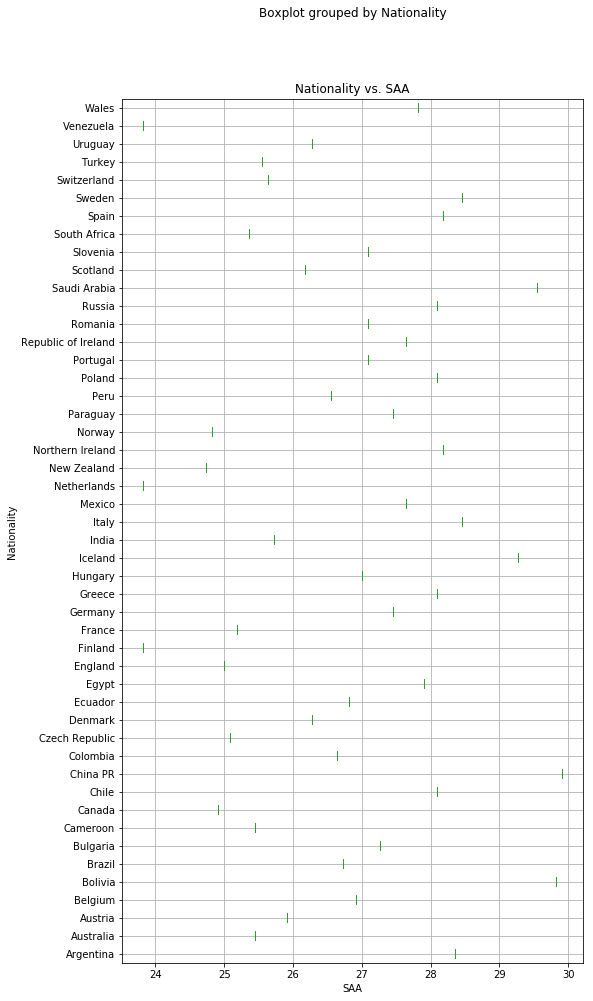

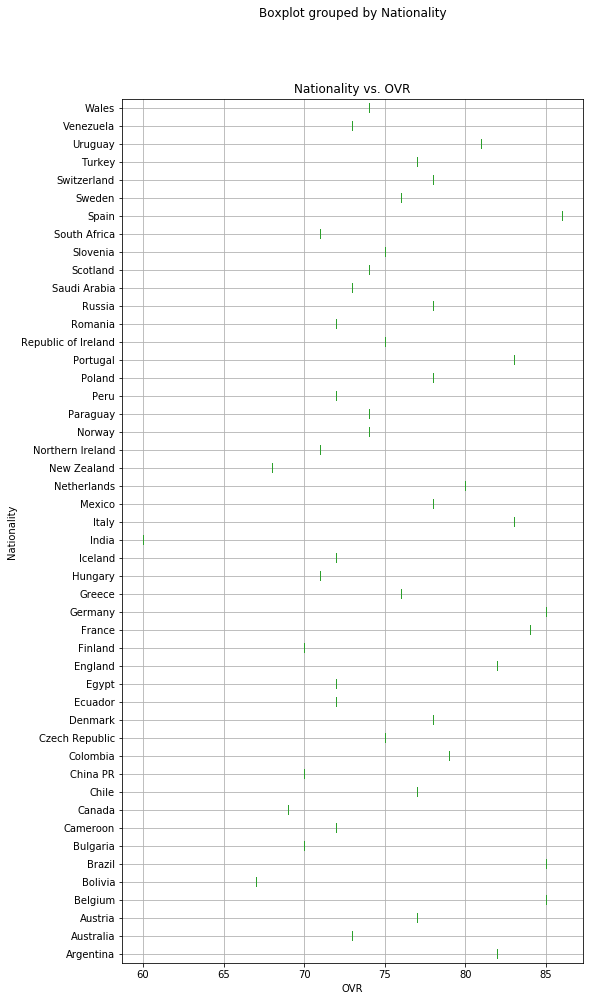

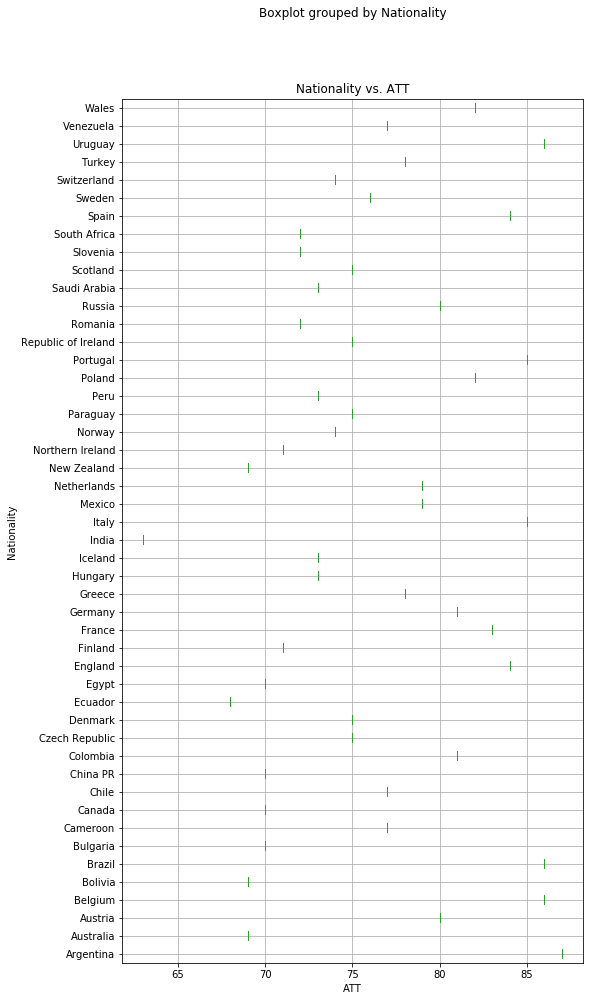

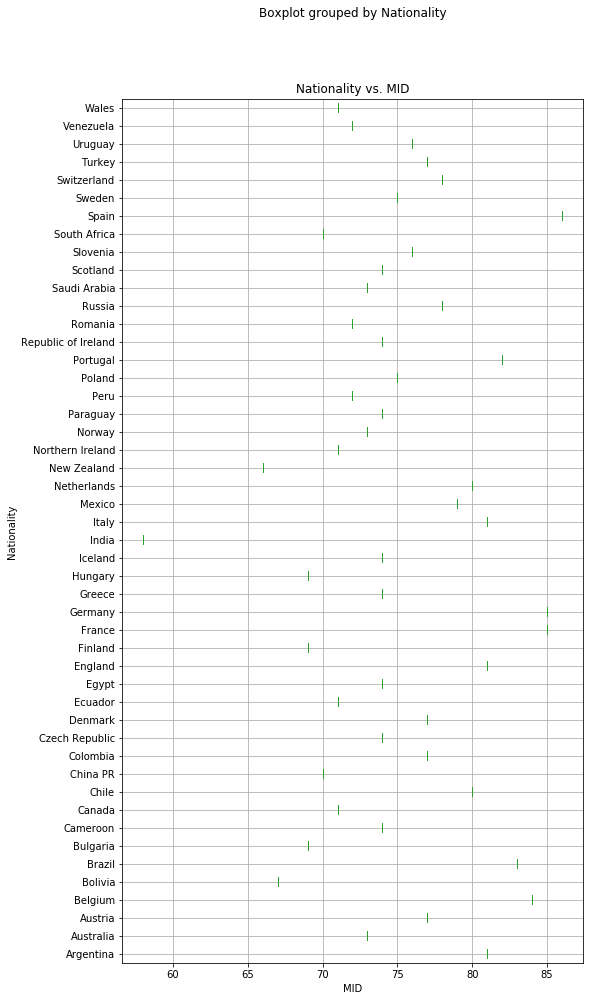

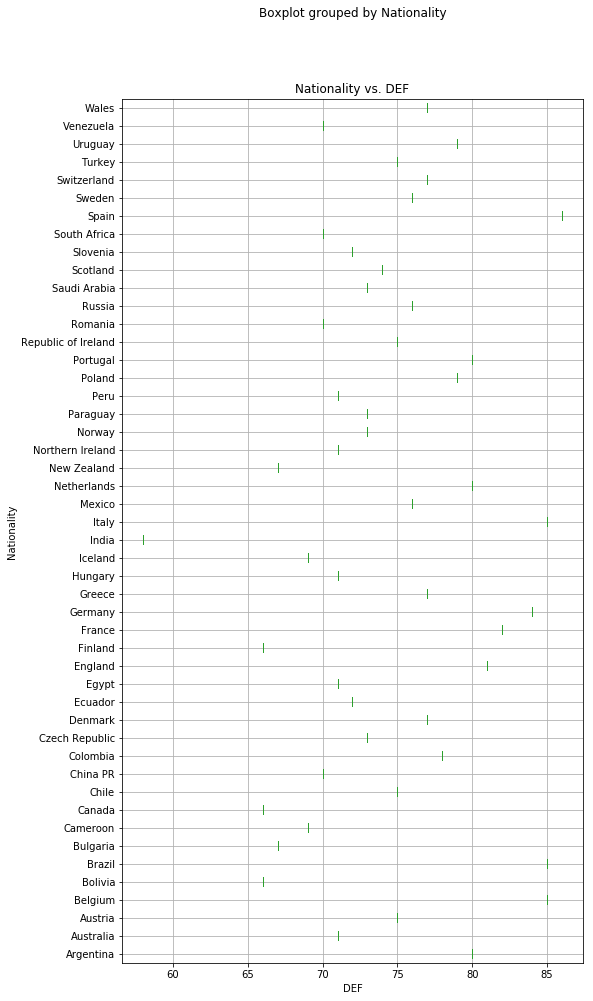

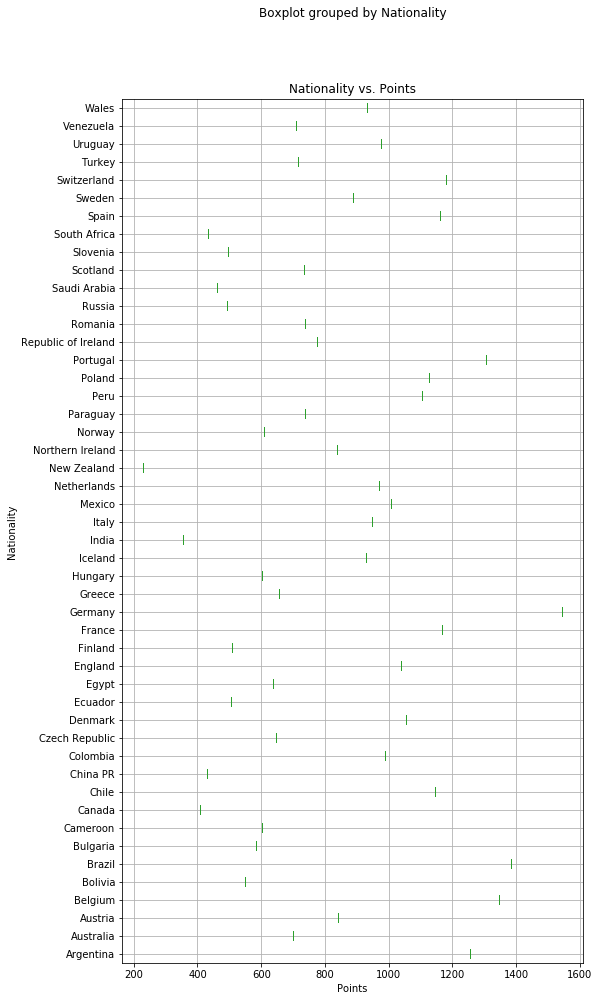

In [69]:
wc_box(stats_rankings, num_cols)

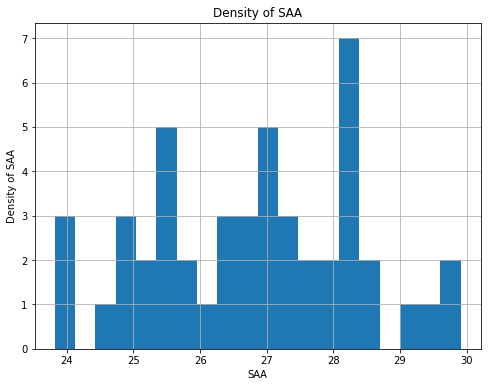

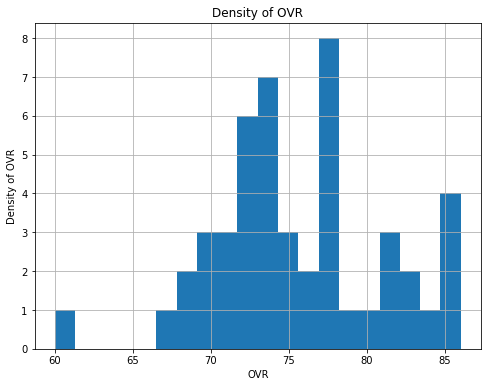

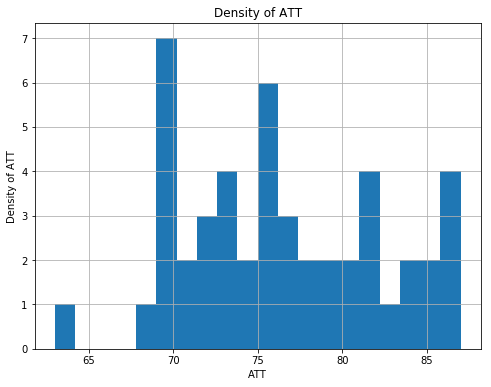

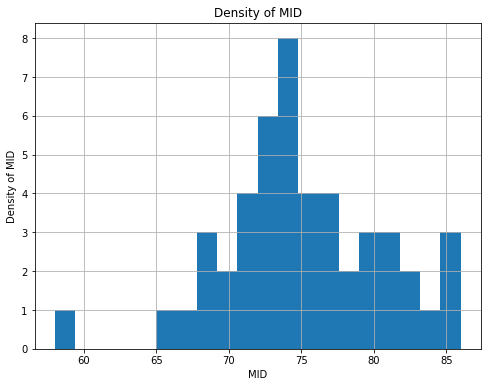

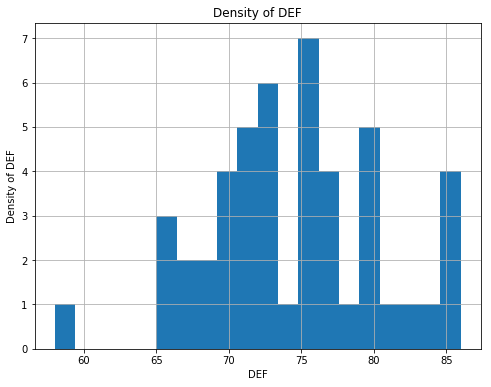

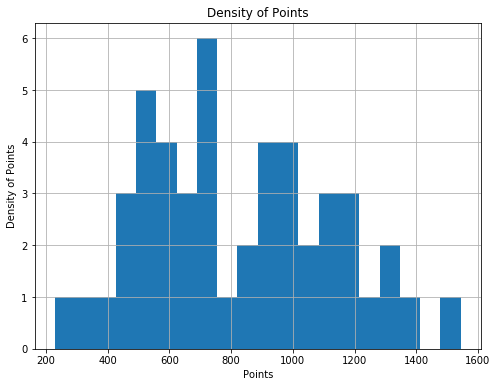

In [29]:
wc_hist(stats_rankings, num_cols)

In [34]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [38]:
results['score_diff'] = results['home_score'] - results['away_score']
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff
39633,2018-06-23,Korea Republic,Mexico,1,2,FIFA World Cup,Rostov-on-Don,Russia,True,2018,6,-1
39634,2018-06-23,Germany,Sweden,2,1,FIFA World Cup,Sochi,Russia,True,2018,6,1
39635,2018-06-24,England,Panama,6,1,FIFA World Cup,Nizhny Novgorod,Russia,True,2018,6,5
39636,2018-06-24,Japan,Senegal,2,2,FIFA World Cup,Ekaterinburg,Russia,True,2018,6,0
39637,2018-06-24,Poland,Colombia,0,3,FIFA World Cup,Kazan,Russia,True,2018,6,-3


In [67]:
results['outcome'] = [0 if x > 0 else 1 if x < 0 else 2 for x in results['score_diff']]
results[(results['month'] == 5) & (results['year'] == 2018)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,score_diff,outcome
39435,2018-05-08,Iraq,Palestine,0,0,Friendly,Basra,Iraq,False,2018,5,0,2
39436,2018-05-09,Algeria,Saudi Arabia,0,2,Friendly,Cádiz,Spain,True,2018,5,-2,1
39437,2018-05-11,Kuwait,Palestine,2,0,Friendly,Kuwait City,Kuwait,False,2018,5,2,0
39438,2018-05-15,Saudi Arabia,Greece,2,0,Friendly,Seville,Spain,True,2018,5,2,0
39439,2018-05-19,Iran,Uzbekistan,1,0,Friendly,Teheran,Iran,False,2018,5,1,0
39440,2018-05-20,Jordan,Cyprus,3,0,Friendly,Amman,Jordan,False,2018,5,3,0
39441,2018-05-25,Kuwait,Egypt,1,1,Friendly,Kuwait,Kuwait,False,2018,5,0,2
39442,2018-05-25,Kenya,Swaziland,0,1,Friendly,Machakos,Kenya,False,2018,5,-1,1
39443,2018-05-26,China,Burma,1,0,Friendly,Nanjing,China,False,2018,5,1,0
39444,2018-05-27,Cameroon,Burkina Faso,0,1,Friendly,Beauvais,France,True,2018,5,-1,1
